# TASK 4

In [3]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats

> Loading dataset in the jupyter notebook

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

-  For the "Median value of owner-occupied homes" provide a boxplot

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


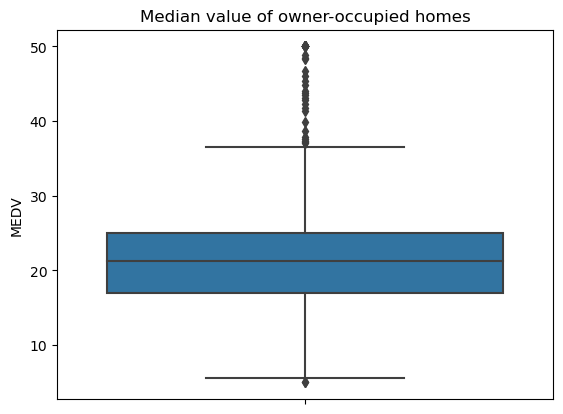

In [6]:
#var of interest MEDV
ax=sns.boxplot(y='MEDV',data=boston_df)
plt.title('Median value of owner-occupied homes')
plt.show()

- Provide a bar plot for the Charles river table

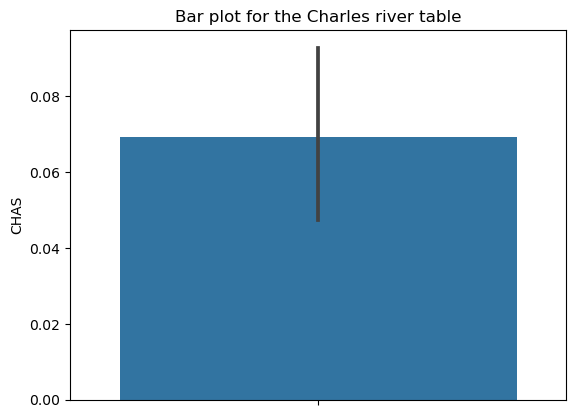

In [7]:
#var of interest CHAS
ax=sns.barplot(y='CHAS',data=boston_df)
plt.title('Bar plot for the Charles river table')
plt.show()

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

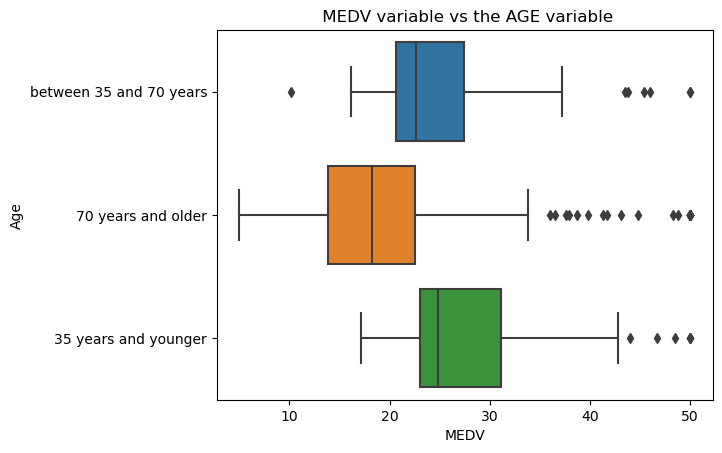

In [8]:
#var of interest MEDV and AGE
boston_df.loc[(boston_df['AGE']<=35),'Age'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<=70),'Age'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>70),'Age'] = '70 years and older'


ax=sns.boxplot(y='Age',x='MEDV',data=boston_df)
plt.title(' MEDV variable vs the AGE variable')
plt.show()

- Provide scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

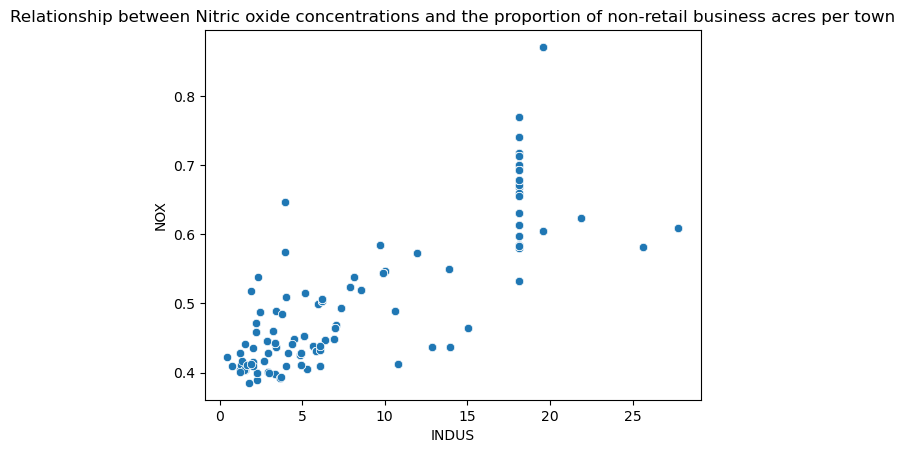

In [22]:
#var of interest NOX and INDUS
ax=sns.scatterplot(y='NOX',x='INDUS',data=boston_df)
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

> What can you say about the relationship?
- It seems that there is a growing tendency, i.e., when the variable INDUS increase, the NOX variable increase too

- Create a histogram for the pupil to teacher ratio variable

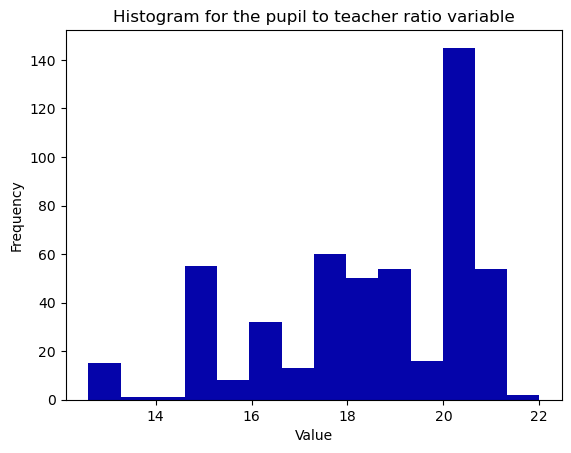

In [10]:
#var of interest PTRATIO
ax=plt.hist(x='PTRATIO',data=boston_df,bins='auto',color='#0504aa')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for the pupil to teacher ratio variable')
plt.show()

# TASK 5

> Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the Hypothesis:
- $H_{0} \, : \, \mu_{1} \, = \, \mu_{2}$
- $H_{1} \, : \, \mu_{1} \, \neq \, \mu_{2}$

In [11]:
#var of interest CHAS and MEDV
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                      boston_df[boston_df['CHAS']==1]['MEDV'],equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

$\textbf{Conclusion:}$ We can see that the p-value is less than alpha, _i.e._, there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis. It means that there is a significant difference in median value of houses bounded by the Charles river.

> Is there a difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the Hypothesis:
- $H_{0} \, : \, \mu_{1} \, = \, \mu_{2} \, = \, \mu_{3}$
- $H_{1} \, : \, \text{At least one of the means differ}$

In [12]:
#var of interest MEDV and AGE
from statsmodels.formula.api import ols
lm = ols('MEDV ~ Age',data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq         F        PR(>F)
Age         2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual  503.0  37314.563532    74.184023       NaN           NaN


$\textbf{Conclusion:}$ We can see that the p-value is less than alpha, _i.e._, there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis. It means that there's at least one mean that differ in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

> Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the Hypothesis:
- $H_{0} \, : \, \text{There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town}$
- $H_{1} \, : \, \text{There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town}$

In [23]:
#var of interest NOX and INDUS
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

$\textbf{Conclusion:}$ We can see that the p-value is less than alpha, _i.e._, there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis, so there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

> What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the Hypothesis:
- $H_{0} \, : \, \beta_{1} = 0 \\ (\text{An additional weighted distance to the five Boston employment centres on the median value of owner occupied homes has no impact})$
- $H_{1} \, : \, \beta_{1} \neq 0 \\(\text{An additional weighted distance to the five Boston employment centres on the median value of owner occupied homes has an impact})$

In [24]:
#var of interest DIS and MEDV

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        22:16:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\textbf{Conclusion:}$ We can see that the p-value is less than alpha, _i.e._, there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis, so, an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes has an impact.